# Santander Value Prediction Challenge

# Intro:

This is my approach to the Santander value prediction challenge which ended in August 2018. My scores were 1.41/1.35 (public and private respectively). Since my main goal for this competition was to practice machine learning skills I have not exploited the so-called [data property](https://www.kaggle.com/c/santander-value-prediction-challenge/discussion/61329) and instead focused on experimenting with new features and modeling approaches.

Here is the official competition description from [Kaggle](https://www.kaggle.com/c/santander-value-prediction-challenge):

>According to Epsilon research, 80% of customers are more likely to do business with you if you provide personalized service. Banking is no exception.
>
>The digitalization of everyday lives means that customers expect services to be delivered in a personalized and timely manner… and often before they´ve even realized they need the service. In their 3rd Kaggle competition, Santander Group aims to go a step beyond recognizing that there is a need to provide a customer a financial service and intends to determine the amount or value of the customer's transaction. This means anticipating customer needs in a more concrete, but also simple and personal way. With so many choices for financial services, this need is greater now than ever before.
>
>In this competition, Santander Group is asking Kagglers to help them identify the value of transactions for each potential customer. This is a first step that Santander needs to nail in order to personalize their services at scale.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read the train.csv file into a datframe
df_train = pd.read_csv('train.csv.zip')
print('Shape: ', df_train.shape)
df_train.head()

Shape:  (4459, 4993)


,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [3]:
# read the test.csv file into a datframe
df_test = pd.read_csv('test.csv.zip')
print('Shape: ', df_test.shape)
df_test.head()

Shape:  (49342, 4992)


,ID,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000137c73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00021489f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0004d7953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00056a333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00056d8eb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Creating New Features

I have created new statistical features for each ID such as mean, median, sum etc using only non-zero values. Also excluding values higher than the highest target value has improved my score.

In [4]:
# create a copy of the train dataframe
train = df_train.copy()
# drop ID, target column 
train = train.drop(columns=["ID", "target"])

# identify the highest target value in df_train
max_val = df_train['target'].max()

# convert train to numpy array
a = np.array(train.values.tolist())
# replace values higher than max_val
a_ = np.where(a > max_val, max_val, a)
# convert back to df
train = pd.DataFrame(a_)

# replace all 0s with NaN
train = train.replace(0, np.NaN)

# create statistical features for the original df
df_train['count_nonzero'] = train.count(axis=1, numeric_only=True)
df_train['median'] = train.median(axis=1, numeric_only=True)
df_train['mean'] = train.mean(axis=1, numeric_only=True)
df_train['sum'] = train.sum(axis=1, numeric_only=True)
df_train['var'] = train.var(axis=1, numeric_only=True)
df_train['std'] = train.std(axis=1, numeric_only=True)
df_train['max'] = train.max(axis=1, numeric_only=True)
df_train['min'] = train.min(axis=1, numeric_only=True)
df_train['skew'] = train.skew(axis=1, numeric_only=True)
df_train['kurtosis'] = train.kurtosis(axis=1, numeric_only=True)
df_train['mode'] = train.mode(axis=1).iloc[:,0]

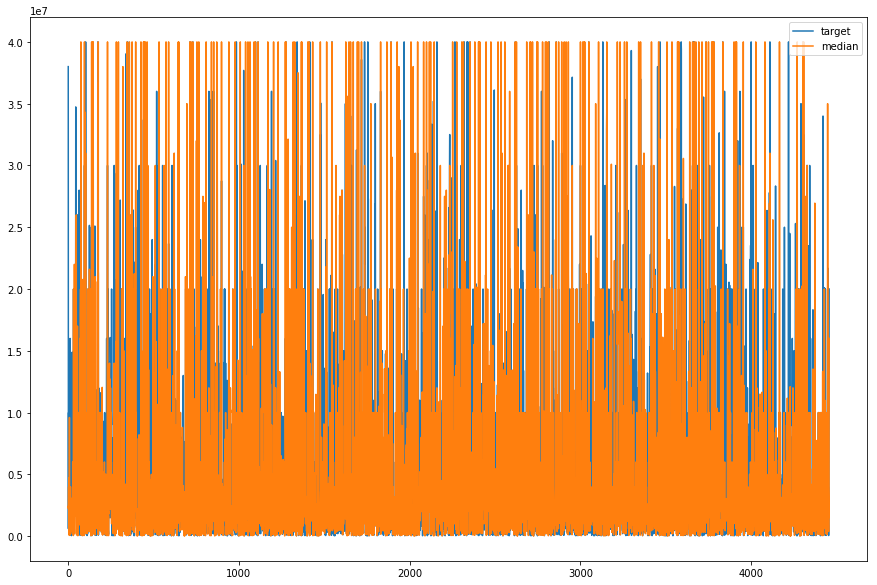

In [5]:
# plotting the target and the newly created median feature
plt.figure(figsize=(15,10))
plt.plot(df_train['target'])
plt.plot(df_train['median'])
plt.legend();

In [6]:
# same as before but for test data
# create a copy of the test dataframe
test = df_test.copy()
# drop ID column 
test = test.drop(columns=["ID"])

# convert test to numpy array
a = np.array(test.values.tolist())
# replace values higher than max_val
a_ = np.where(a > max_val, max_val, a)
# convert back to df
test = pd.DataFrame(a_)

# replace all 0s with NaN
test = test.replace(0, np.NaN)

# create median and mode features for the original df
df_test['count_nonzero'] = test.count(axis=1, numeric_only=True)
df_test['median'] = test.median(axis=1, numeric_only=True)
df_test['mean'] = test.mean(axis=1, numeric_only=True)
df_test['sum'] = test.sum(axis=1, numeric_only=True)
df_test['var'] = test.var(axis=1, numeric_only=True)
df_test['std'] = test.std(axis=1, numeric_only=True)
df_test['max'] = test.max(axis=1, numeric_only=True)
df_test['min'] = test.min(axis=1, numeric_only=True)
df_test['skew'] = test.skew(axis=1, numeric_only=True)
df_test['kurtosis'] = test.kurtosis(axis=1, numeric_only=True)
df_test['mode'] = test.mode(axis=1).iloc[:,0]

# Preparing Data for Machine Learning

In [7]:
# create a copy of the dataframes
X_train = df_train.copy()
X_test = df_test.copy()

# extract the labels
y_train = X_train['target']

# log transform the labels:
y_train = np.log1p(y_train)

# remove target and ID columns
X_train = X_train.drop(['target', 'ID'], axis=1)
X_test = X_test.drop(['ID'], axis=1)

# align train and test data, keep only columns present in both dataframes
X_train, X_test = X_train.align(X_test, join = 'inner', axis = 1)

print('Train shape: ', X_train.shape)
print('Test shape: ', X_test.shape)

Train shape:  (4459, 5002)
Test shape:  (49342, 5002)


In [8]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline

# define the number number of splits, alphas
kfolds = KFold(n_splits=5, random_state=42)

# define a function to calculate the RMSE (root mean squared error) for a given model
def rmse_cv(model):
    rmse = np.sqrt((-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kfolds)))
    return(rmse)

/home/gelo_tomi/miniconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


# Modeling: XGBoost + LightGBM (Ensemble/ Model Averaging)

The below code for the modeling part has been taken from [this public kernel](https://www.kaggle.com/alexpengxiao/preprocessing-model-averaging-by-xgb-lgb-1-39).

In [9]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

# ensemble method: model averaging
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # define clones of the original models to fit the data in
    # the reason of clone is avoiding affect the original base models
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]  
        # train cloned base models
        for model in self.models_:
            model.fit(X, y)
        return self
    
    # predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([ model.predict(X) for model in self.models_ ])
        return np.mean(predictions, axis=1)
    

model_xgb = xgb.XGBRegressor(colsample_bytree=0.055, colsample_bylevel =0.5, 
                             gamma=1.5, learning_rate=0.02, max_depth=32, 
                             objective='reg:linear',booster='gbtree',
                             min_child_weight=57, n_estimators=1000, reg_alpha=0, 
                             reg_lambda = 0,eval_metric = 'rmse', subsample=0.7, 
                             silent=1, n_jobs = -1, early_stopping_rounds = 14,
                             random_state =7, nthread = -1)

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=144,
                              learning_rate=0.005, n_estimators=720, max_depth=13,
                              metric='rmse',is_training_metric=True,
                              max_bin = 55, bagging_fraction = 0.8,verbose=-1,
                              bagging_freq = 5, feature_fraction = 0.9) 

score = rmse_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmse_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

averaged_models = AveragingModels(models = (model_xgb, model_lgb))

score = rmse_cv(averaged_models)
print("averaged score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

Xgboost score: 1.3650 (0.0514)

LGBM score: 1.3439 (0.0435)

averaged score: 1.3457 (0.0480)



In [10]:
# fit on train data
averaged_models.fit(X_train, y_train)

# predict on the test data
preds = np.expm1(averaged_models.predict(X_test))

# make a submission dataframe
submit = df_test.loc[:, ['ID']]
submit.loc[:, 'target'] = preds

# save the submission dataframe
submit.to_csv('submission.csv', index = False)